16:52:21 - cmdstanpy - INFO - Chain [1] start processing
16:52:21 - cmdstanpy - INFO - Chain [1] done processing


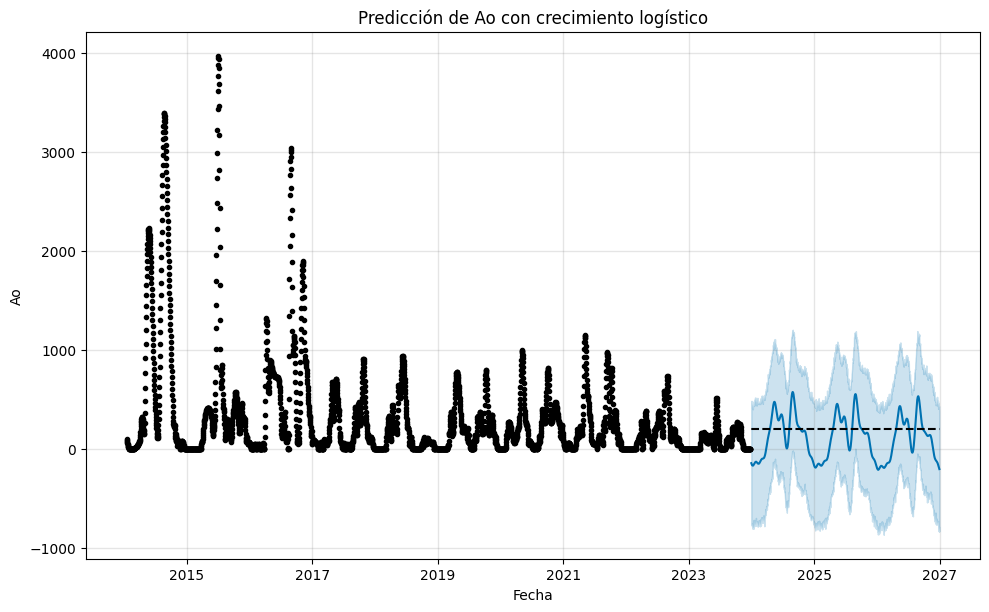

C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Lo

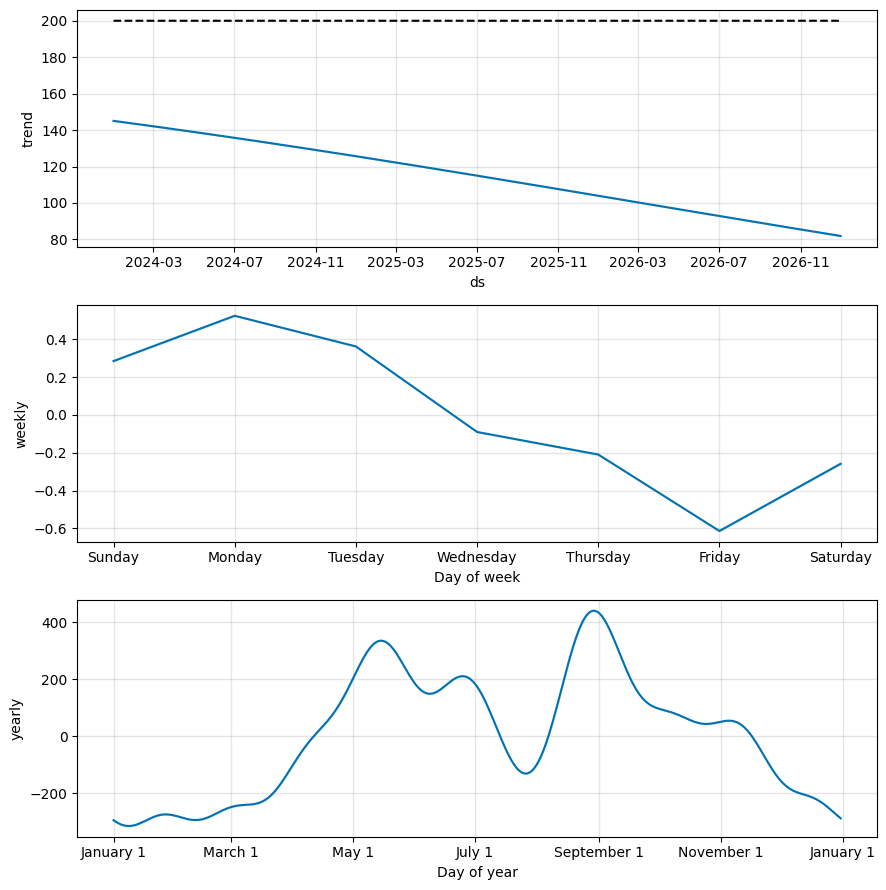

             ds        yhat  yhat_lower  yhat_upper
0    2024-01-01 -145.171122 -761.783012  457.960211
1    2024-01-02 -150.540267 -767.233159  484.342790
2    2024-01-03 -155.709494 -759.115066  422.408214
3    2024-01-04 -159.979752 -750.113547  459.293937
4    2024-01-05 -163.905330 -784.660987  448.527239
...         ...         ...         ...         ...
1091 2026-12-27 -179.961444 -829.679456  451.710388
1092 2026-12-28 -185.997062 -782.787108  421.278090
1093 2026-12-29 -192.396822 -836.743422  430.623771
1094 2026-12-30 -198.949729 -786.594310  430.791357
1095 2026-12-31 -204.932592 -832.596699  375.190666

[1096 rows x 4 columns]


In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Leer los datos desde un archivo CSV (ajusta el nombre del archivo según sea necesario)
df = pd.read_csv('../data/processed/medias3.csv')

# Convertir la columna de fechas a formato datetime
df['fecha'] = pd.to_datetime(df['index'])

# Renombrar columnas para que Prophet las entienda
df = df.rename(columns={'fecha': 'ds', 'ao': 'y'})

# Definir la capacidad máxima (ajusta este valor según tus datos)
df['cap'] = 200  # Ejemplo de capacidad máxima

# Crear y ajustar el modelo Prophet con crecimiento logístico
model = Prophet(growth='logistic')

# Ajustar el modelo a los datos
model.fit(df)

# Crear un DataFrame con las fechas para predecir
future_dates = pd.date_range(start='2024-01-01', end='2026-12-31', freq='D')
future = pd.DataFrame(future_dates, columns=['ds'])

# Definir la capacidad máxima para las fechas futuras
future['cap'] = 200  # Mismo valor que se usó para los datos históricos

# Hacer predicciones
forecast = model.predict(future)

# Visualizar las predicciones
fig = model.plot(forecast)
plt.xlabel('Fecha')
plt.ylabel('Ao')
plt.title('Predicción de Ao con crecimiento logístico')
plt.show()

# Visualizar los componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()

# Mostrar las predicciones
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
